In [34]:
import regex as re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from collections import defaultdict
from collection import groupcount
from sk1earn import roundFunction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kartheepan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kartheepan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kartheepan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from sklearn.datasets import fetch_20newsgroups
news_data = fetch_20newsgroups(subset = 'all', random_state=1)

In [4]:
data = pd.DataFrame(news_data.data, columns=['count'])
data['group'] = news_data.target
data['group'] = data['group'].map(lambda i:news_data.target_names[i])

groupCount = data.groupby('group').size().reset_index(name='og_count')
print(groupCount)

,group,og_count
0,alt.atheism,799
1,comp.graphics,973
2,comp.os.ms-windows.misc,985
3,comp.sys.ibm.pc.hardware,982
4,comp.sys.mac.hardware,963
5,comp.windows.x,988
6,misc.forsale,975
7,rec.autos,990
8,rec.motorcycles,996
9,rec.sport.baseball,994


In [5]:
data = pd.DataFrame(news_data.data, columns=['count'])
data['group'] = news_data.target
data['group'] = data['group'].map(lambda i:news_data.target_names[i].split('.')[1])

groupCount = data.groupby('group').size().reset_index(name='og_count')
print(groupCount)

,group,og_count
0,atheism,799
1,autos,990
2,crypt,991
3,electronics,984
4,forsale,975
5,graphics,973
6,med,990
7,motorcycles,996
8,os,985
9,politics,2625


In [6]:
data = pd.DataFrame(news_data.data, columns=['count'])
data['group'] = news_data.target
data['group'] = data['group'].map(lambda i:news_data.target_names[i].split('.')[0])

groupCount = data.groupby('group').size().reset_index(name='og_count')
print(groupCount)

,group,og_count
0,alt,799
1,comp,4891
2,misc,975
3,rec,3979
4,sci,3952
5,soc,997
6,talk,3253


In [7]:
def removeStopwords(text):
    words = text.split()
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

In [8]:
def lemmatization(text):
    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lWords = [lemmatizer.lemmatize(word) for word in words]
    lText = ' '.join(lWords)
    return lText

In [9]:
def preprocess(text):
    text = str(text.split(':')[-1])
    text = text.lower()
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[\d_]+', '', text)
    text = removeStopwords(text)
    text = lemmatization(text)
    return text

In [10]:
textData = list(news_data.data)
for index, text in enumerate(textData):
    textData[index] = preprocess(text)

# Tf - idf

In [11]:
vectorizer = TfidfVectorizer()
textVec = vectorizer.fit_transform(textData)

## PCA

In [36]:
textVecArray = textVec.toarray()
pca = PCA(n_components=2)

pca.fit(textVecArray)
X_pca = pca.transform(textVecArray)

X_pca.shape

(18846, 2)

## K Means

/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


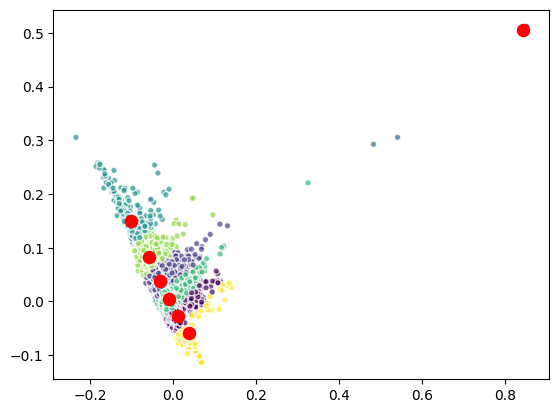

7 0.4892936019322902
   count
0    799
1   4891
2    975
3   3979
4   3952
5    997
6   3253


/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


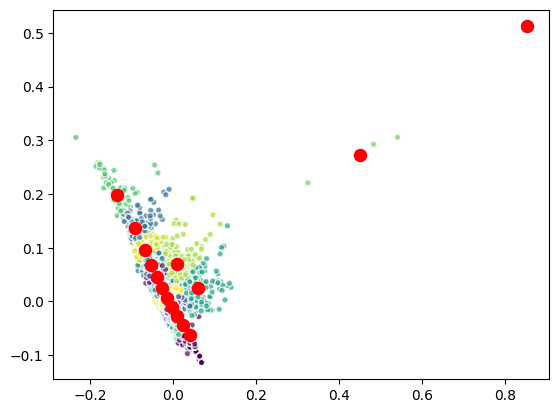

15 0.43748391237134715
    count
0     799
1     990
2     991
3     984
4     975
5     973
6     990
7     996
8     985
9    2625
10   1625
11    987
12   1993
13   1945
14    988


/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


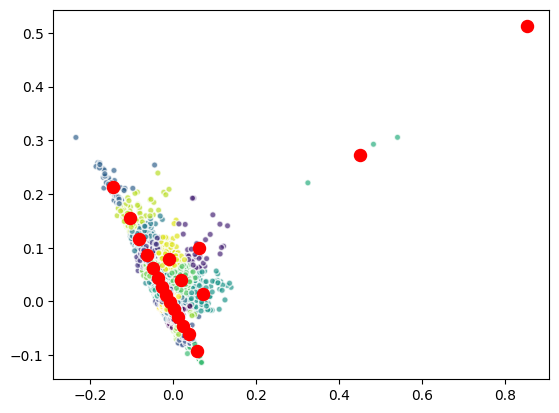

20 0.42661021667938454
    count
0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628


In [37]:
nClusters = [7, 15, 20]
silhouetteScore = defaultdict(float)
groupCount = defaultdict(pd.DataFrame)
for i in nClusters:
    kmeans = KMeans(n_clusters=i, random_state=69)
    kmeans.fit(X_pca)

    clusterLabels = kmeans.labels_
    silhouetteScore[i] = silhouette_score(X_pca, clusterLabels)

    clusterCount = np.bincount(clusterLabels)
    tempDict = {}
    for index, count in enumerate(clusterCount):
        tempDict[index] = count
    tempDict = pd.DataFrame.from_dict(tempDict, orient='index', columns=['count'])
    groupCount[i] = tempDict

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=20, alpha=0.7, edgecolors='w')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c='red', s=75)
    plt.show()
    print(i, silhouetteScore[i])
    print(groupcount[i])

## DB Scan

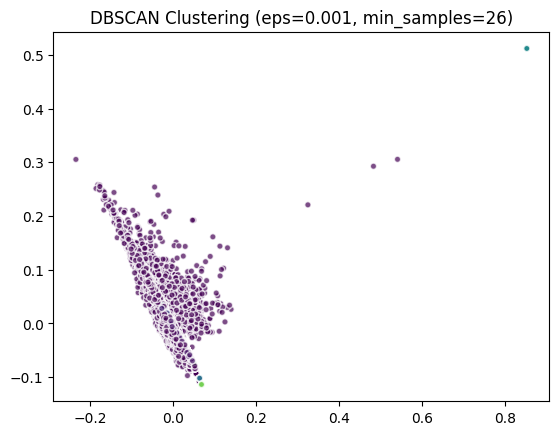

EPS=0.001, Min Samples=26
Silhouette Score: 0.42661021667938454
Cluster Counts:
     count
0     801
1     963
2     982
3     991
4     968
5     988
6     976
7     991
8    1006
9     982
10    993
11    986
12    984
13    990
14   1007
15    977
16    903
17    948
18    771
19    636


In [38]:
eps, min_samples = 0.001, 26

silhouette_scores = {}
group_count = {}

dbscan = DBSCAN(eps=0.001, min_samples=26)
cluster_labels = dbscan.fit_predict(X_pca)

silhouette_scores[(eps, min_samples)] = silhouette_score(X_pca, cluster_labels)

cluster_count = pd.Series(cluster_labels).value_counts().sort_index()
group_count[(eps, min_samples)] = cluster_count

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=20, alpha=0.7, edgecolors='w')
plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.show()
print(f"EPS={eps}, Min Samples={min_samples}")
print("Silhouette Score:", silhouetteScore[20])
print("Cluster Counts:\n", groupcount[tuple((0.001, 26))])

## AGNES

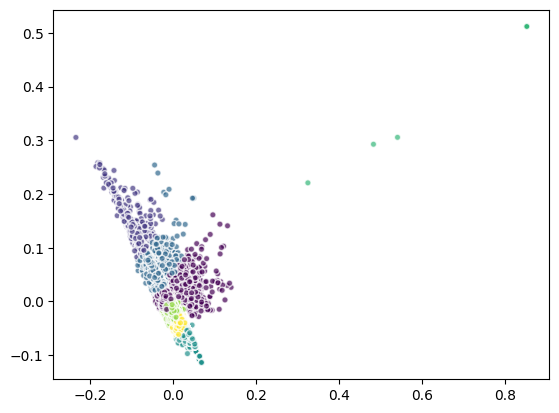

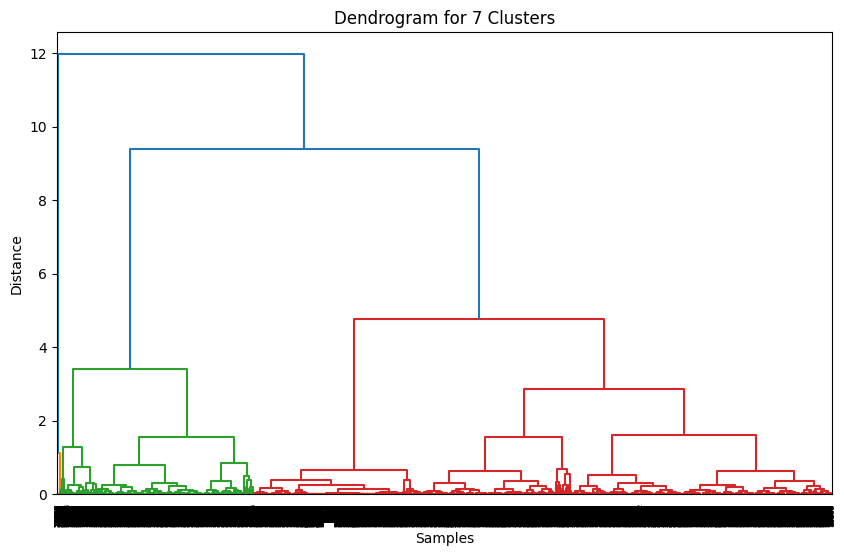

7 0.4892936019322902
   count
0    799
1   4891
2    975
3   3979
4   3952
5    997
6   3253


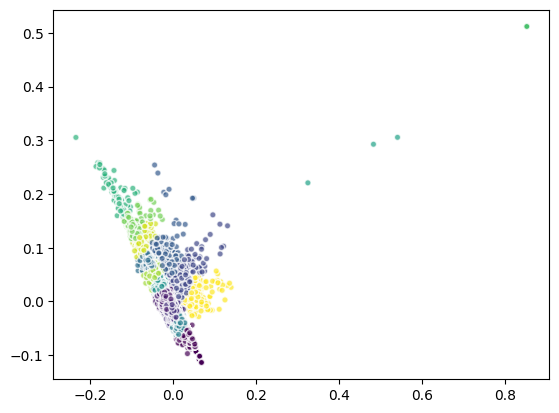

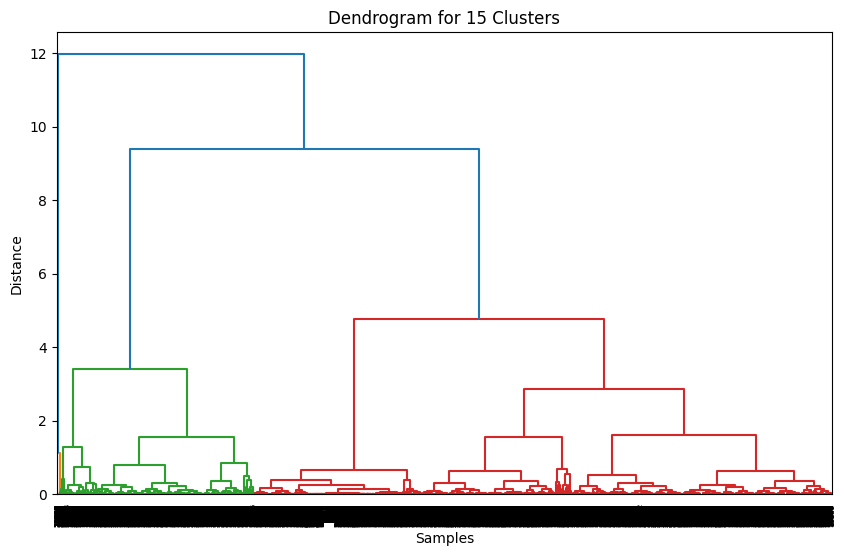

15 0.43748391237134715
    count
0     799
1     990
2     991
3     984
4     975
5     973
6     990
7     996
8     985
9    2625
10   1625
11    987
12   1993
13   1945
14    988


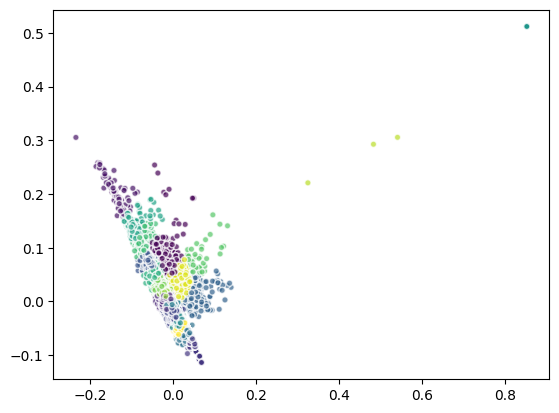

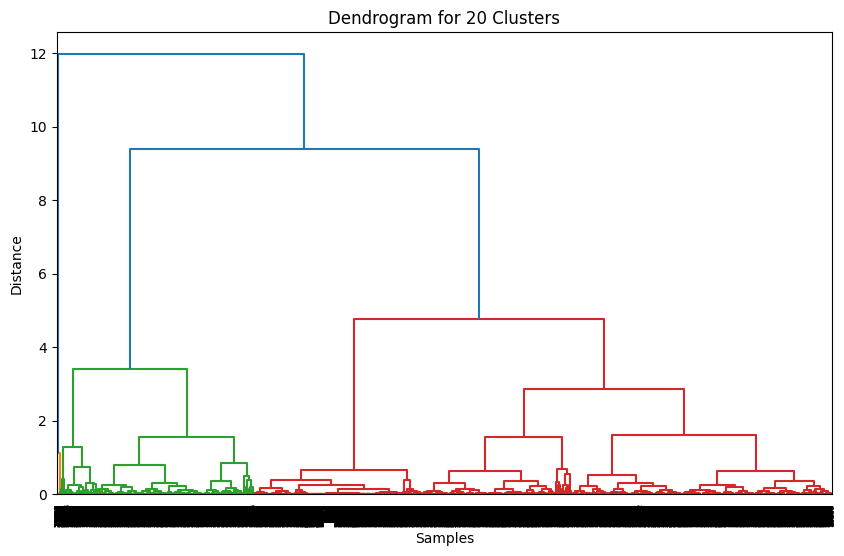

20 0.42661021667938454
    count
0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628


In [39]:
nClusters = [7, 15, 20]
silhouette_scorea = defaultdict(float)
groupCount = defaultdict(pd.DataFrame)

for i in nClusters:
    agnes = AgglomerativeClustering(n_clusters=i)
    clusterLabels = agnes.fit_predict(X_pca)

    silhouette_scores[i] = silhouette_score(X_pca, clusterLabels)

    clusterCount = np.bincount(clusterLabels)
    tempDict = {}
    for index, count in enumerate(clusterCount):
        tempDict[index] = count
    tempDict = pd.DataFrame.from_dict(tempDict, orient='index', columns=['count'])
    groupCount[i] = tempDict

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusterLabels, cmap='viridis', s=20, alpha=0.7, edgecolors='w')
    plt.show()

    dist_mat = pdist(X_pca)
    linkage_matrix = linkage(dist_mat, method='ward')

    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram for {i} Clusters')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

    print(i, silhouetteScore[i])
    print(groupcount[i])

# Word2Vec

In [40]:
tokenized_data = [word_tokenize(sentence.lower()) for sentence in textData]
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    n_words = 0
    for word in words:
        if word in vocabulary:
            n_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if n_words:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

word_vectors = []
for words in tokenized_data:
    word_vectors.append(average_word_vectors(words, model, model.wv.index_to_key, 100))

## PCA

In [41]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(word_vectors)

X_pca.shape

(18846, 2)

## K Means

/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


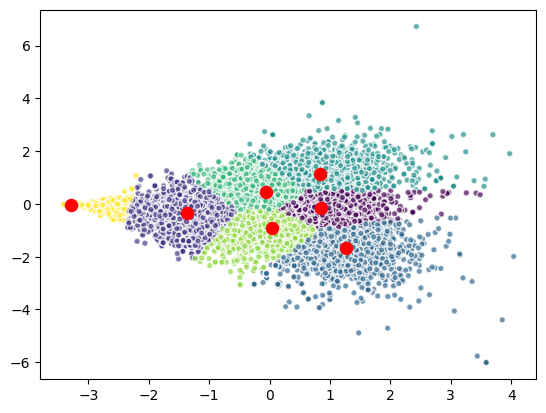

7 0.3827328976062418
   count
0    799
1   4891
2    975
3   3979
4   3952
5    997
6   3253


/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


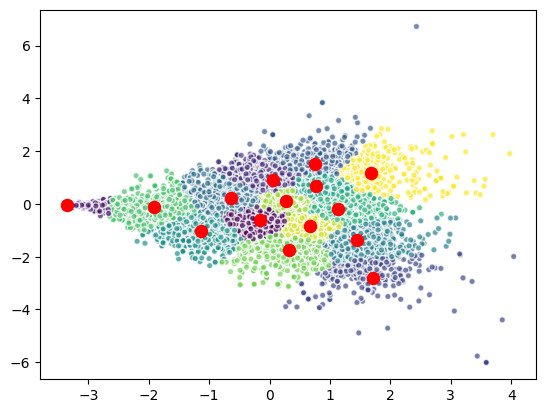

15 0.3736471030436508
    count
0     799
1     990
2     991
3     984
4     975
5     973
6     990
7     996
8     985
9    2625
10   1625
11    987
12   1993
13   1945
14    988


/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


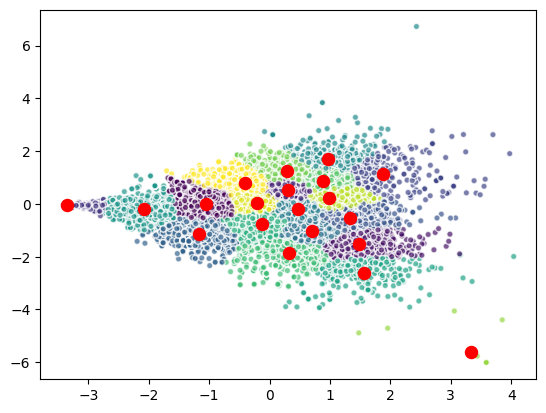

20 0.37736474787412816
    count
0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628


In [42]:
nClusters = [7, 15, 20]
silhouetteScore = defaultdict(float)
groupCount = defaultdict(pd.DataFrame)
for i in nClusters:
    kmeans = KMeans(n_clusters=i, random_state=69)
    kmeans.fit(X_pca)

    clusterLabels = kmeans.labels_
    silhouetteScore[i] = silhouette_score(X_pca, clusterLabels)

    clusterCount = np.bincount(clusterLabels)
    tempDict = {}
    for index, count in enumerate(clusterCount):
        tempDict[index] = count
    tempDict = pd.DataFrame.from_dict(tempDict, orient='index', columns=['count'])
    groupCount[i] = tempDict

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=20, alpha=0.7, edgecolors='w')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c='red', s=75)
    plt.show()
    print(i, silhouetteScore[i])
    print(groupcount[i])

## AGNES

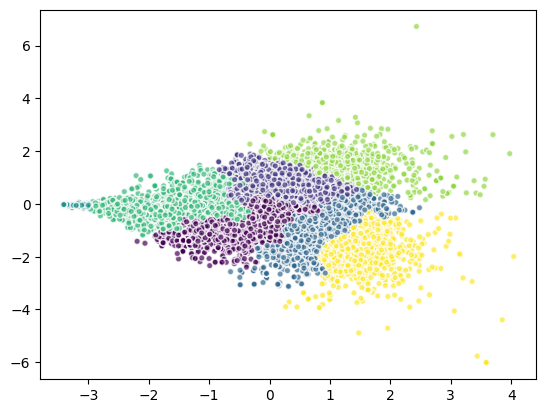

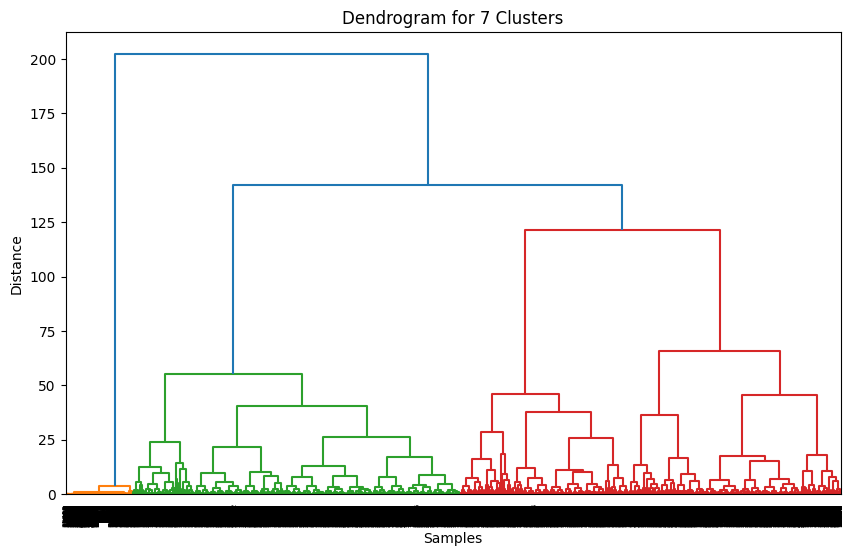

7 0.3827328976062418
   count
0    799
1   4891
2    975
3   3979
4   3952
5    997
6   3253


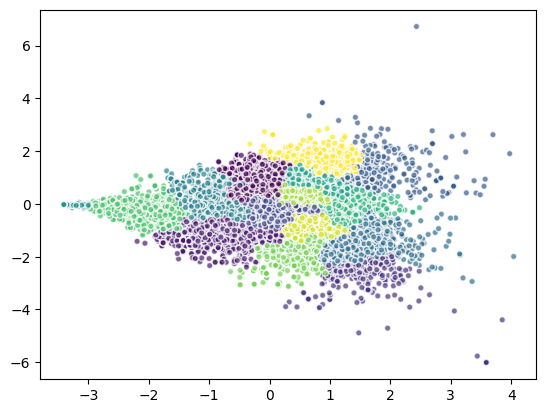

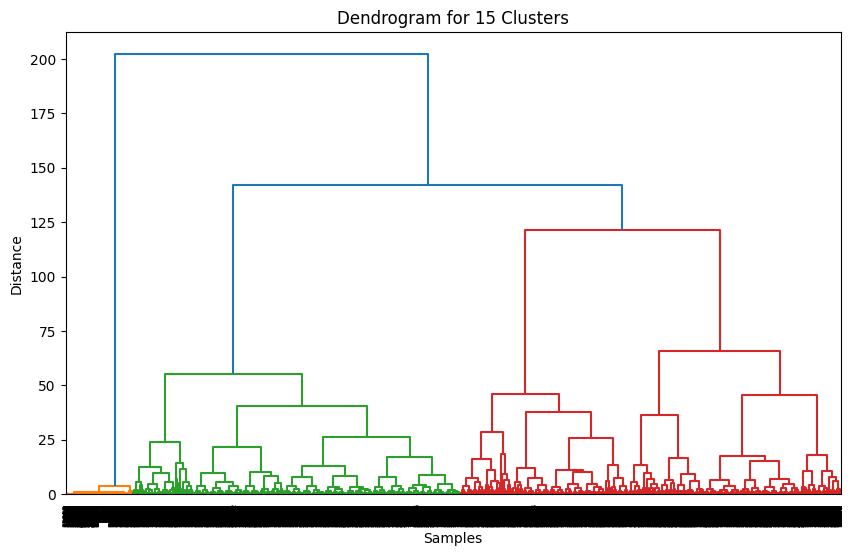

15 0.3736471030436508
    count
0     799
1     990
2     991
3     984
4     975
5     973
6     990
7     996
8     985
9    2625
10   1625
11    987
12   1993
13   1945
14    988


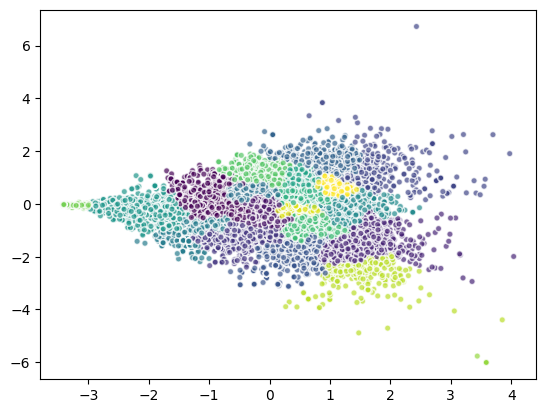

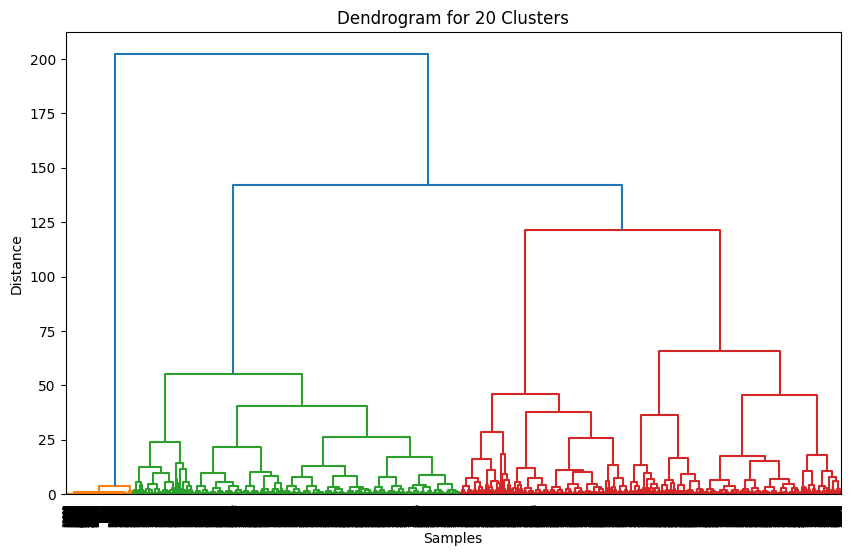

20 0.37736474787412816
    count
0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628


In [43]:
nClusters = [7, 15, 20]
silhouette_scorea = defaultdict(float)
groupCount = defaultdict(pd.DataFrame)

for i in nClusters:
    agnes = AgglomerativeClustering(n_clusters=i)
    clusterLabels = agnes.fit_predict(X_pca)

    silhouette_scores[i] = silhouette_score(X_pca, clusterLabels)

    clusterCount = np.bincount(clusterLabels)
    tempDict = {}
    for index, count in enumerate(clusterCount):
        tempDict[index] = count
    tempDict = pd.DataFrame.from_dict(tempDict, orient='index', columns=['count'])
    groupCount[i] = tempDict

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusterLabels, cmap='viridis', s=20, alpha=0.7, edgecolors='w')
    plt.show()

    dist_mat = pdist(X_pca)
    linkage_matrix = linkage(dist_mat, method='ward')

    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram for {i} Clusters')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

    print(i, silhouetteScore[i])
    print(groupcount[i])

## DBSCAN (not so good)

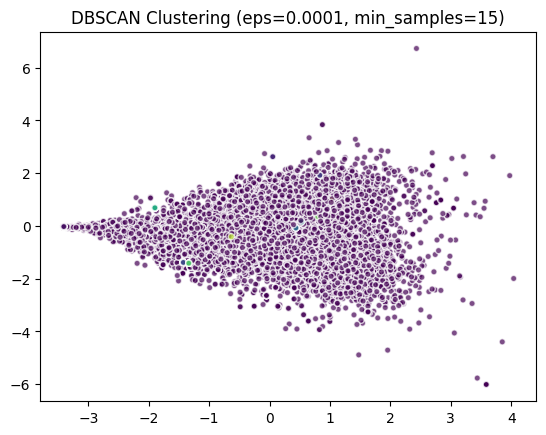

EPS=0.0001, Min Samples=15
Silhouette Score: -0.5779561473187502
Cluster Counts:
 -1     17770
 0       698
 1        15
 2        31
 3        27
 4        19
 5        72
 6        15
 7        22
 8        22
 9        18
 10       16
 11       15
 12       26
 13       15
 14       15
 15       15
 16       20
 17       15
Name: count, dtype: int64


In [44]:
eps, min_samples = 0.0001, 15

silhouette_scores = {}
group_count = {}

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X_pca)

silhouette_scores[(eps, min_samples)] = silhouette_score(X_pca, cluster_labels)

cluster_count = pd.Series(cluster_labels).value_counts().sort_index()
group_count[(eps, min_samples)] = cluster_count

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=20, alpha=0.7, edgecolors='w')
plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.show()

print(f"EPS={eps}, Min Samples={min_samples}")
print("Silhouette Score:", silhouette_scores[(eps, min_samples)])
print("Cluster Counts:\n", group_count[(eps, min_samples)])

# GloVE

In [45]:
tokenized_data = [sentence.lower().split() for sentence in textData]
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=10, sg=1, negative=5, min_count=1, workers=4)

def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    n_words = 0
    for word in words:
        if word in vocabulary:
            n_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if n_words:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

word_vectors = []
for words in tokenized_data:
    word_vectors.append(average_word_vectors(words, model, model.wv.index_to_key, 100))

## PCA

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(word_vectors)

X_pca.shape

(18846, 2)

## K Means

/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


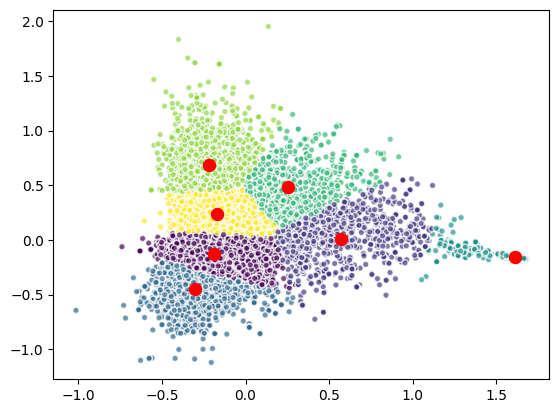

7 0.3972468838098633
   count
0    799
1   4891
2    975
3   3979
4   3952
5    997
6   3253


/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


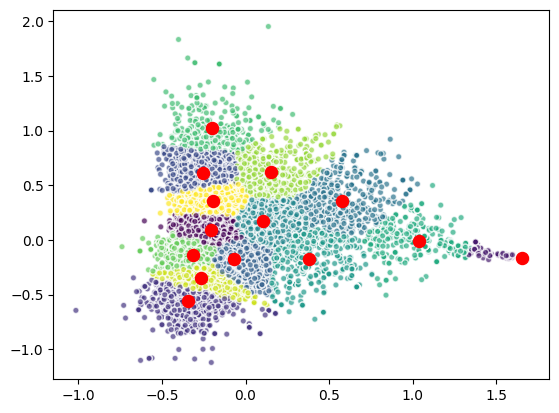

14 0.36757580211852303
Empty DataFrame
Columns: []
Index: []


/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


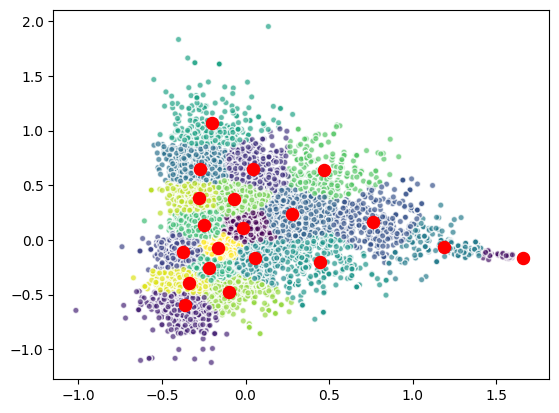

20 0.37378930070639405
    count
0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628


In [47]:
nClusters = [7, 14, 20]
silhouetteScore = defaultdict(float)
groupCount = defaultdict(pd.DataFrame)
for i in nClusters:
    kmeans = KMeans(n_clusters=i, random_state=69)
    kmeans.fit(X_pca)

    clusterLabels = kmeans.labels_
    silhouetteScore[i] = silhouette_score(X_pca, clusterLabels)

    clusterCount = np.bincount(clusterLabels)
    tempDict = {}
    for index, count in enumerate(clusterCount):
        tempDict[index] = count
    tempDict = pd.DataFrame.from_dict(tempDict, orient='index', columns=['count'])
    groupCount[i] = tempDict

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=20, alpha=0.7, edgecolors='w')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c='red', s=75)
    plt.show()
    print(i, silhouetteScore[i])
    print(groupcount[i])

## DBSCAN

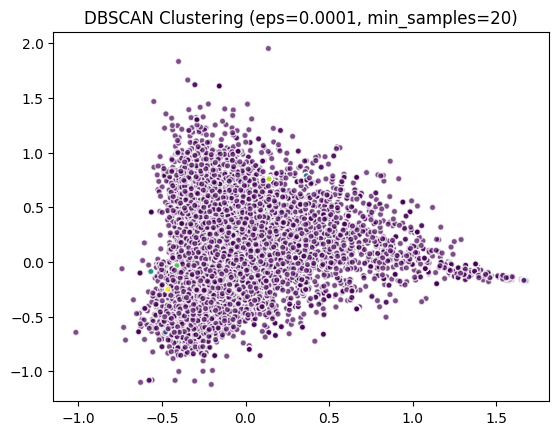

EPS=0.0001, Min Samples=20
Silhouette Score: -0.44025535395565557
Cluster Counts:
 -1    17928
 0      698
 1       31
 2       27
 3       72
 4       22
 5       22
 6       26
 7       20
Name: count, dtype: int64


In [48]:
eps, min_samples = 0.0001, 20

silhouette_scores = {}
group_count = {}

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X_pca)

silhouette_scores[(eps, min_samples)] = silhouette_score(X_pca, cluster_labels)

cluster_count = pd.Series(cluster_labels).value_counts().sort_index()
group_count[(eps, min_samples)] = cluster_count

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=20, alpha=0.7, edgecolors='w')
plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.show()

print(f"EPS={eps}, Min Samples={min_samples}")
print("Silhouette Score:", silhouette_scores[(eps, min_samples)])
print("Cluster Counts:\n", group_count[(eps, min_samples)])

## AGNES

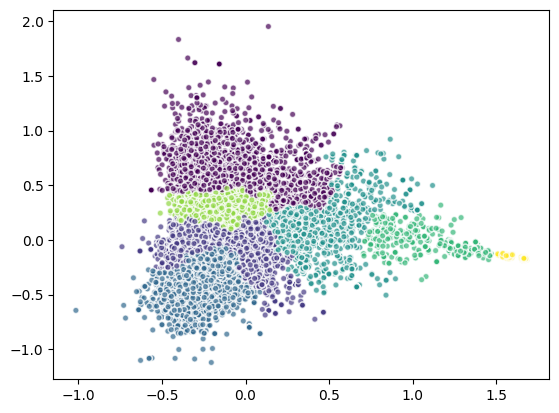

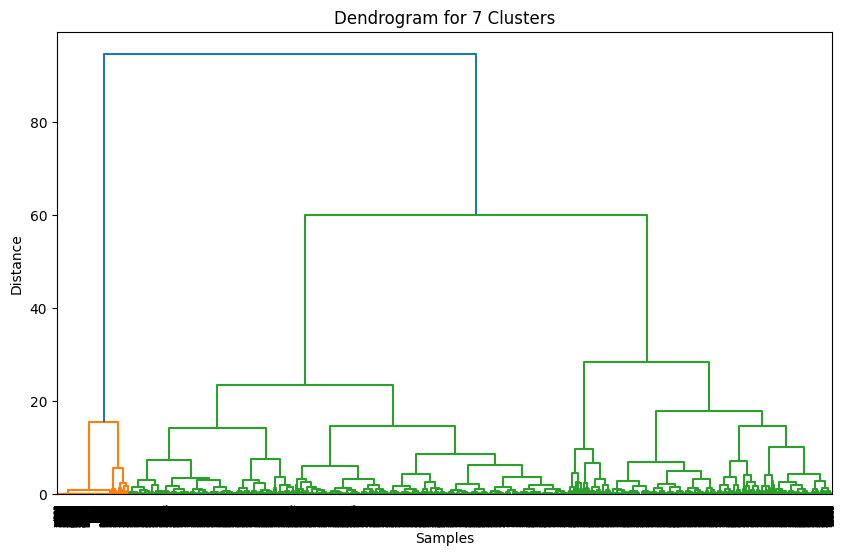

7 0.3972468838098633
   count
0    799
1   4891
2    975
3   3979
4   3952
5    997
6   3253


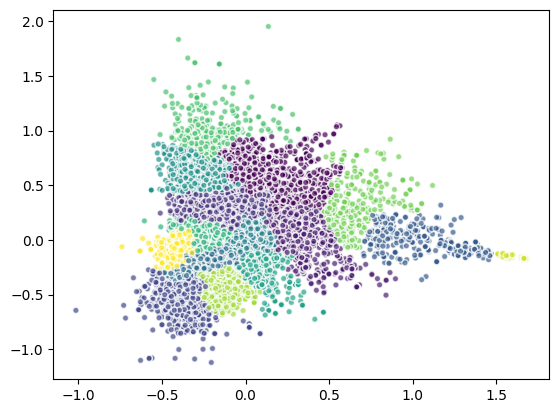

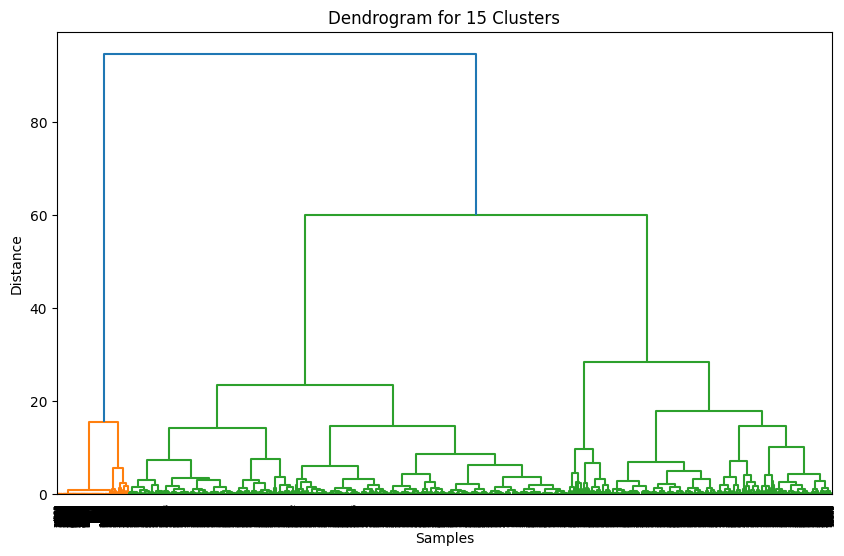

15 0.0
    count
0     799
1     990
2     991
3     984
4     975
5     973
6     990
7     996
8     985
9    2625
10   1625
11    987
12   1993
13   1945
14    988


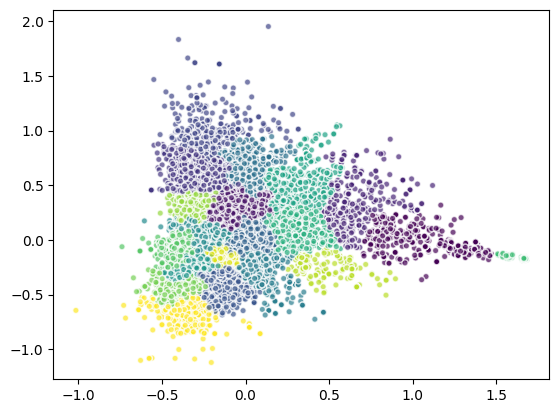

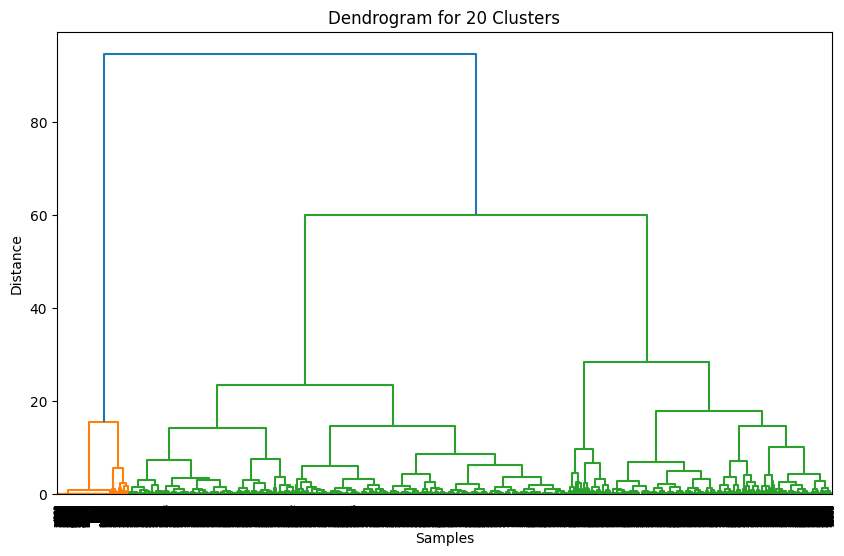

20 0.37378930070639405
    count
0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628


In [49]:
nClusters = [7, 15, 20]
silhouette_scorea = defaultdict(float)
groupCount = defaultdict(pd.DataFrame)

for i in nClusters:
    agnes = AgglomerativeClustering(n_clusters=i)
    clusterLabels = agnes.fit_predict(X_pca)

    silhouette_scores[i] = silhouette_score(X_pca, clusterLabels)

    clusterCount = np.bincount(clusterLabels)
    tempDict = {}
    for index, count in enumerate(clusterCount):
        tempDict[index] = count
    tempDict = pd.DataFrame.from_dict(tempDict, orient='index', columns=['count'])
    groupCount[i] = tempDict

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusterLabels, cmap='viridis', s=20, alpha=0.7, edgecolors='w')
    plt.show()

    dist_mat = pdist(X_pca)
    linkage_matrix = linkage(dist_mat, method='ward')

    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram for {i} Clusters')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

    print(i, silhouetteScore[i])
    print(groupcount[i])